**runDM**

*With runDMC, it's Tricky. With runDM, it's not.*

`runDM` is a tool for calculating the low energy couplings of Dark Matter (DM) to light quarks in Simplified Models with vector mediators. By specifying the mass of the mediator and the couplings of the mediator to SM fields at high energy, the code outputs the low energy couplings to up, down and strange quarks, taking into account the mixing of all dimension-6 operators.

Let's start by importing the runDM module:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as pl

import runDM

First, let's specify the couplings at high energy. This will be an 1-D array with 16 elements. `runDM` comes with a number of pre-defined benchmarks, which can be accessed using `setBenchmark`.

In [2]:
c_high = runDM.setBenchmark("UniversalVector")
print "Vector coupling to all SM fermions:", c_high

c_high = runDM.setBenchmark("QuarksAxial")
print "Axial-vector coupling to all quarks:", c_high

Vector coupling to all SM fermions: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
Axial-vector coupling to all quarks: [-1.  1.  1.  0.  0. -1.  1.  1.  0.  0. -1.  1.  1.  0.  0.  0.]


Alternatively, you can specify each coupling individually. You can use initCouplings() to generate an empty array of couplings and then go ahead. But any array of 16 elements with do.

In [3]:
c_high = runDM.initCouplings()
c_high[0] = 1.0
c_high[1] = -1.0
c_high[12] = 1.0
print "User-defined couplings:", c_high

User-defined couplings: [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


From these high energy couplings (defined at some energy $E_1$), you can obtain the couplings at a different energy scale $E_2$ by using `runCouplings`(c, $E_1$, $E_2$).

The input coupling vector c should always be the list of high energy couplings to fully gauge-invariant operators above the EW scale (see Eq. ??? of the manual) - even if $E_1$ is below $m_Z$. The output is either a list of coefficients for the same operators - if $E_2$ is above $m_Z$ - or the list of coefficients for the low energy operators (see Eq. ??? of the manual) - if $E_2$ is below $m_Z$. Don't worry, runDM takes care of the relative values of $E_1$ and $E_2$.


In [15]:
E1 = 1000
E2 = 1
c_low = runDM.runCouplings(c_high, E1, E2)
print "Low energy couplings:", c_low

Low energy couplings: [ 0.02686599 -0.05014611  0.02686599 -0.05014611 -0.03789215 -0.00358586
 -0.00358586 -0.00358602  0.92657376  1.07342624  0.92657376  1.07342624
  1.06115806  0.07342624  0.07342624  0.07342619]


If we're only interested in direct detection experiments, we can use the function `DDCouplings`(c, $E_1$). In this case, the code evolves the couplings from energy $E_1$, down to the nuclear energy scale ~ 1 GeV. The output is an array with 5 elements, the vector and axial-vector couplings to the light quarks: $c_q = \left(c_V^{(u)}, c_V^{(d)}, c_A^{(u)}, c_A^{(d)},c_A^{(s)}\right)$. Let's print them out:

In [14]:
c_q = runDM.DDCouplings(c_high, E1)

couplings_str = ['c_V^u','c_V^d','c_A^u','c_A^d','c_A^s']

for k in range(5):
    print couplings_str[k], "=", c_q[k]

c_V^u = 0.0268659852556
c_V^d = -0.0501461132169
c_A^u = 0.926573758822
c_A^d = 1.07342624118
c_A^s = 1.07342624118


Finally, let's take a look at the value of the low-energy light quark couplings (evaluated at $\mu_N \sim 1 \, \mathrm{GeV}$) as a function of the mediator mass $m_V$. 

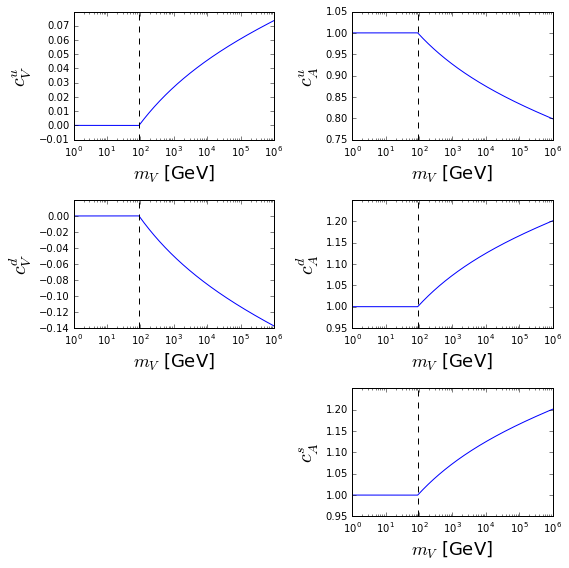

In [11]:
mV = np.logspace(0, 6, 1000)
c_q = np.zeros([1000,5])

#Set the value of the high energy couplings
c_high = runDM.setBenchmark("QuarksAxial")

#Calculate the low energy couplings
for i in range(1000):
    c_q[i,:] = runDM.DDCouplings(c_high, mV[i])

#Now let's do some plotting
f, axarr = pl.subplots(3,2 ,figsize=(8,8))

for k in range(5):
    if (k < 2): #Vector currents
        ax = axarr[k%3, 0]
    else:       #Axial-vector currents
        ax = axarr[(k+1)%3, 1]
        
    ax.semilogx(mV, c_q[:,k])
    ax.set_xlabel(r'$m_V$ [GeV]', fontsize=18.0)
    ax.set_ylabel(r'$'+couplings_str[k]+'$', fontsize=20.0)
    ax.axvline(91.1875, color='k', linestyle='--')
    ax.set_xlim(1.0, 10**6)
    ax.get_yticklabels()[-1].set_visible(False)
    
axarr[2,0].set_axis_off()
pl.tight_layout()

